In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [2]:
low_heat_brome_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_brome_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_brome_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_brome= pd.DataFrame(
    data=zip(
        low_heat_brome_1["Reads"],
        low_heat_brome_2["Reads"],
        low_heat_brome_3["Reads"],
    ),
    columns=["brome Cold Rep 1", "brome Cold Rep 2" ,"brome Cold Rep 3",],
    index=low_heat_brome_1.index,
)


In [3]:
low_heat_brome

,brome Cold Rep 1,brome Cold Rep 2,brome Cold Rep 3
LOC104581917,0,0,0
LOC100827252,0,0,0
LOC100827520,143,202,137
LOC100834957,1,6,6
LOC100826906,36,30,47
...,...,...,...
BrdiC_t037,0,0,0
BrdiC_p085,0,0,0
BrdiC_p086,0,0,0
BrdiC_t038,0,0,0


In [4]:
high_heat_brome_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_flooded/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_brome_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_flooded/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_brome_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Brome/Brome_flooded/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_brome= pd.DataFrame(
    data=zip(
        high_heat_brome_1["Reads"],
        high_heat_brome_2["Reads"],
        high_heat_brome_3["Reads"],
    ),
    columns=["brome Hot Rep 1", "brome Hot Rep 2" ,"brome Hot Rep 3",],
    index=high_heat_brome_1.index,
)


In [5]:
high_heat_brome

,brome Hot Rep 1,brome Hot Rep 2,brome Hot Rep 3
LOC104581917,0,0,0
LOC100827252,1,0,0
LOC100827520,77,139,88
LOC100834957,24,34,48
LOC100826906,10,11,11
...,...,...,...
BrdiC_t037,0,0,0
BrdiC_p085,0,0,0
BrdiC_p086,0,0,0
BrdiC_t038,0,0,0


In [6]:
combined_brome = pd.concat([low_heat_brome, high_heat_brome], axis=1)

In [7]:
combined_brome

,brome Cold Rep 1,brome Cold Rep 2,brome Cold Rep 3,brome Hot Rep 1,brome Hot Rep 2,brome Hot Rep 3
LOC104581917,0,0,0,0,0,0
LOC100827252,0,0,0,1,0,0
LOC100827520,143,202,137,77,139,88
LOC100834957,1,6,6,24,34,48
LOC100826906,36,30,47,10,11,11
...,...,...,...,...,...,...
BrdiC_t037,0,0,0,0,0,0
BrdiC_p085,0,0,0,0,0,0
BrdiC_p086,0,0,0,0,0,0
BrdiC_t038,0,0,0,0,0,0


In [8]:
brome_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "brome Cold Rep 1",
        "brome Cold Rep 2",
        "brome Cold Rep 3",
        "brome Hot Rep 1",
        "brome Hot Rep 2",
        "brome Hot Rep 3",
    ],
)

In [9]:
low_heat_soybean_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_soybean_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_soybean_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)



low_heat_soybean = pd.DataFrame(
    data=zip(
        low_heat_soybean_1["Reads"],
        low_heat_soybean_2["Reads"],
        low_heat_soybean_3["Reads"],
    ),
    columns=["soybean Cold Rep 1", "soybean Cold Rep 2", "soybean Cold Rep 3",],
    index=low_heat_soybean_1.index,
)


In [10]:
low_heat_soybean.index = low_heat_soybean.index.str.split('.').str[0].str.upper()+'_' + low_heat_soybean.index.str.split('.').str[1]

In [11]:
# low_heat_soybean.index = low_heat_soybean.index.str.split(':').str[1]
low_heat_soybean

,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
GLYMA_01G000322,16,18,29
GLYMA_01G000400,467,497,500
GLYMA_01G000600,284,335,370
GLYMA_01G000750,0,0,0
GLYMA_01G000900,430,673,658
...,...,...,...
GLYMA_20G249700,1393,1345,1512
GLYMA_20G249800,5215,3390,4037
GLYMA_20G249900,294,234,274
GLYMA_20G250000,494,650,690


In [15]:
high_heat_soybean_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_flooded/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_soybean_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_flooded/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_soybean_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Soybean/Soybean_flooded/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_soybean = pd.DataFrame(
    data=zip(
        high_heat_soybean_rep_1["Reads"],
        high_heat_soybean_rep_2["Reads"],
        high_heat_soybean_rep_3["Reads"],
    ),
    columns=["soybean Hot Rep 1", "soybean Hot Rep 2", "soybean Hot Rep 3",],
    index=low_heat_soybean_1.index,
)

In [16]:
high_heat_soybean.index = high_heat_soybean.index.str.split('.').str[0].str.upper()+'_' + high_heat_soybean.index.str.split('.').str[1]
high_heat_soybean

,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3
GLYMA_01G000322,21,16,35
GLYMA_01G000400,449,431,528
GLYMA_01G000600,428,355,451
GLYMA_01G000750,0,0,0
GLYMA_01G000900,901,736,996
...,...,...,...
GLYMA_20G249700,1988,1747,2243
GLYMA_20G249800,2653,2192,3305
GLYMA_20G249900,203,204,216
GLYMA_20G250000,700,539,939


In [17]:
combined_soybean = pd.concat([high_heat_soybean, low_heat_soybean], axis=1)

In [18]:
combined_soybean = combined_soybean.T




In [19]:
combined_brome = combined_brome.T

In [20]:
combined_brome.to_csv("/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_reads.csv")
combined_soybean.to_csv("/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_reads.csv")

In [21]:
soybean_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "soybean Hot Rep 1",
        "soybean Hot Rep 2",
        "soybean Hot Rep 3",
        "soybean Cold Rep 1",
        "soybean Cold Rep 2",
        "soybean Cold Rep 3",
    ],
)

In [22]:
genes_to_keep_brome = combined_brome.columns[combined_brome.sum(axis=0) >= 100]
combined_brome = combined_brome[genes_to_keep_brome]
inference_brome = DefaultInference(n_cpus=30)
dds_brome = DeseqDataSet(
    counts=combined_brome,
    metadata=brome_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_brome,
)
dds_brome.deseq2()
stat_res_brome = DeseqStats(dds_brome, inference=inference_brome)
stat_res_brome.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.29 seconds.

Fitting dispersion trend curve...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 1.43 seconds.

Fitting LFCs...
... done in 1.23 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
LOC100827520  128.920044        0.061443  0.319928  0.192052  8.477011e-01   
LOC100834957   23.936160        3.752967  0.582680  6.440867  1.187927e-10   
LOC100826906   21.197859       -1.032729  0.460880 -2.240778  2.504044e-02   
LOC100844744   82.992119       -1.024906  0.271418 -3.776114  1.592942e-04   
LOC100828734  753.766561        0.502099  0.127432  3.940131  8.143711e-05   
...                  ...             ...       ...       ...           ...   
BrdiC_p003    424.697890        0.456808  0.156247  2.923627  3.459789e-03   
BrdiC_p004     72.976878        0.771421  0.257733  2.993106  2.761537e-03   
BrdiC_p005     29.783573        0.373176  0.419388  0.889811  3.735672e-01   
BrdiC_p072    222.347133        0.413005  0.186034  2.220051  2.641533e-02   
BrdiC_p075     92.579945        0.515440  0.266890  1.931286  5.344772e-02   

        

... done in 1.03 seconds.



In [23]:
genes_to_keep = combined_soybean.columns[combined_soybean.sum(axis=0) >= 100]
combined_soybean = combined_soybean[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_soybean,
    metadata=soybean_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res_soybean = DeseqStats(dds, inference=inference)
stat_res_soybean.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.07 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 2.44 seconds.

Fitting LFCs...
... done in 1.98 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                    baseMean  log2FoldChange     lfcSE      stat  \
GLYMA_01G000322    22.036269        0.274457  0.476149  0.576410   
GLYMA_01G000400   476.034338        0.037230  0.136237  0.273276   
GLYMA_01G000600   368.857765        0.416337  0.144185  2.887511   
GLYMA_01G000900   728.885736        0.680659  0.178505  3.813113   
GLYMA_01G001000   442.703824        0.402593  0.168362  2.391231   
...                      ...             ...       ...       ...   
GLYMA_20G249700  1703.746016        0.582504  0.117478  4.958400   
GLYMA_20G249800  3434.962320       -0.567461  0.230473 -2.462163   
GLYMA_20G249900   236.653204       -0.270273  0.207895 -1.300045   
GLYMA_20G250000   660.075588        0.331738  0.184835  1.794776   
GLYMA_20G250200   394.136698        0.657948  0.153337  4.290862   

                       pvalue      padj  
GLYMA_01G000322  5.643378e-01  0.653979  
GLYMA_01G000400  7.846409e-01  0.839901  
GL

... done in 1.40 seconds.



In [24]:
full_results_soybean = stat_res_soybean.results_df
full_results_soybean
full_results_brome = stat_res_brome.results_df

In [25]:
full_results_soybean.to_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_gene_results.csv')
full_results_brome.to_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_gene_results.csv')

/tmp/ipykernel_859437/302837962.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=full_results_soybean['log2FoldChange'],y=full_results_soybean['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")
/tmp/ipykernel_859437/302837962.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")


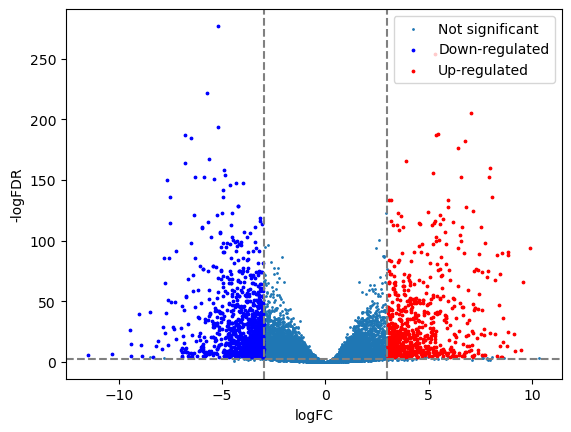

In [26]:
plt.scatter(x=full_results_soybean['log2FoldChange'],y=full_results_soybean['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down_arabi = full_results_soybean[(full_results_soybean['log2FoldChange']<=-3)&(full_results_soybean['padj']<=0.0001)]
up_arabi = full_results_soybean[(full_results_soybean['log2FoldChange']>=3)&(full_results_soybean['padj']<=0.0001)]

plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [ ]:
up_arabi

In [ ]:
up

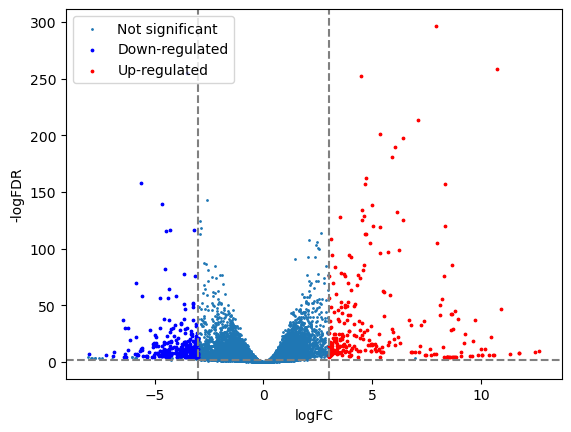

In [27]:
plt.scatter(x=full_results_brome['log2FoldChange'],y=full_results_brome['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = full_results_brome[(full_results_brome['log2FoldChange']<=-3)&(full_results_brome['padj']<=0.0001)]
up = full_results_brome[(full_results_brome['log2FoldChange']>=3)&(full_results_brome['padj']<=0.0001)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()